In [1]:
import pandas

In [2]:
df = pd.read_csv("baby-names-state.csv",low_memory=False)

<IPython.core.display.Javascript object>

In [3]:
df1=df[['sex','name']]

In [4]:
df1

,sex,name
0,F,Mary
1,F,Annie
2,F,Anna
3,F,Margaret
4,F,Helen
...,...,...
6215829,M,Simon
6215830,M,Sterling
6215831,M,Stetson
6215832,M,Timothy


C:\Users\visha\AppData\Local\Temp\ipykernel_11400\292176771.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['name'] = df1['name'].str.lower()
C:\Users\visha\AppData\Local\Temp\ipykernel_11400\292176771.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sex'] = df1['sex'].map({'M': 0, 'F': 1})


sex     0
name    0
dtype: int64


c:\Users\visha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9347
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93    551629
           1       0.94      0.94      0.94    691538

    accuracy                           0.93   1243167
   macro avg       0.93      0.93      0.93   1243167
weighted avg       0.93      0.93      0.93   1243167

Confusion Matrix:
[[513181  38448]
 [ 42789 648749]]


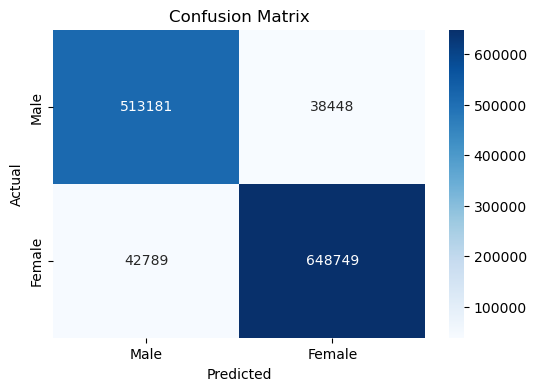

['gender_prediction_model.pkl']

In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the dataset
# Replace 'name_gender_dataset.csv' with your actual dataset
# The dataset is assumed to have columns: 'name' and 'gender' (Male/Female)
# df = pd.read_csv('name_gender_dataset.csv')

# 2. Data Preprocessing
# Convert names to lowercase
df1['name'] = df1['name'].str.lower()

# Label encoding: 'male' -> 0, 'female' -> 1
df1['sex'] = df1['sex'].map({'M': 0, 'F': 1})

# Check for missing values (optional)
print(df1.isnull().sum())

# 3. Feature Engineering
# Using character n-grams (1 to 3 characters)
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 3))

# Transform the 'name' column into features
X = vectorizer.fit_transform(df1['name'])
y = df1['sex']

# 4. Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Model Training
# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# 6. Model Evaluation
# Predict on test set
y_pred = model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting the confusion matrix for visualization
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 7. Model Deployment
# You can save the model for future use
import joblib
joblib.dump(model, 'gender_prediction_model.pkl')


In [6]:
import joblib
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# 1. Load the trained model
model = joblib.load('gender_prediction_model.pkl')

# 2. Load the same vectorizer used during training
# We need to fit the vectorizer on the same data it was trained on
# df = pd.read_csv('name_gender_dataset.csv')
df1['name'] = df1['name'].str.lower()

# Initialize the vectorizer and fit it again on the same data
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 3))
X = vectorizer.fit_transform(df1['name'])

# 3. Define a function to preprocess and predict new data
def predict_gender(names):
    # Ensure the names are in a list
    if isinstance(names, str):
        names = [names]

    # Preprocess: Convert to lowercase and transform using the same vectorizer
    names_transformed = vectorizer.transform([name.lower() for name in names])

    # Predict using the loaded model
    predictions = model.predict(names_transformed)
    
    # Map numerical predictions back to 'male' and 'female'
    gender_map = {0: 'M', 1: 'F'}
    predicted_genders = [gender_map[pred] for pred in predictions]
    
    return list(zip(names, predicted_genders))




C:\Users\visha\AppData\Local\Temp\ipykernel_11400\1768474814.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['name'] = df1['name'].str.lower()


Name: John, Predicted Gender: M
Name: Emma, Predicted Gender: F
Name: Aarav, Predicted Gender: M
Name: Sophia, Predicted Gender: F


In [17]:
# 4. Example: Predict gender for new names
new_names = ["Jay"]
predicted_genders = predict_gender(new_names)

# 5. Output the predictions
for name, gender in predicted_genders:
    print(f"Name: {name}, Predicted Gender: {gender}")

Name: Jay, Predicted Gender: M


In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

# Load the dataset (replace with your dataset)
# df = pd.read_csv('name_gender_dataset.csv')

# Preprocessing
df1['name'] = df1['name'].str.lower()  # Convert names to lowercase
df1['sex'] = df1['sex'].map({'M': 0, 'F': 1})  # Label encoding

# Feature extraction using character n-grams
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 3))
X = vectorizer.fit_transform(df1['name'])
y = df1['sex']


In [9]:
y

0          1
1          1
2          1
3          1
4          1
          ..
6215829    0
6215830    0
6215831    0
6215832    0
6215833    0
Name: sex, Length: 6215834, dtype: int64

In [10]:

# Algorithms to evaluate
algorithms = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Test sizes to evaluate
test_sizes = [0.2, 0.3]

# Loop through different test sizes and algorithms
for test_size in test_sizes:
    print(f"### Results for Test Size: {test_size} ###\n")
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    for name, model in algorithms.items():
        print(f"--- {name} ---")
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.4f}")
        
        # Print classification report
        print(classification_report(y_test, y_pred))
        
    print("\n" + "#" * 50 + "\n")



### Results for Test Size: 0.2 ###

--- Logistic Regression ---
Accuracy: 0.9347
              precision    recall  f1-score   support

           0       0.92      0.93      0.93    551629
           1       0.94      0.94      0.94    691538

    accuracy                           0.93   1243167
   macro avg       0.93      0.93      0.93   1243167
weighted avg       0.93      0.93      0.93   1243167

--- Random Forest ---
